## 02.Logistic Regression

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

Description of Variables

The dataset contains 6366 observations of 9 variables:
     
- rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
- age: woman's age
- yrs_married: number of years married
- children: number of children
- religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)
- educ: level of education (9 = grade school, 12 = high school, 14 =some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
- occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)
- occupation_husb: husband's occupation (same coding as above)
- affairs: time spent in extra-marital affairs


Code to loading data and modules:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.cross_validation import train_test_split 
from sklearn import metrics 
from sklearn.cross_validation import cross_val_score 

dta =sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0 represents not dta['affair'] = (dta.affairs > 0).astype(int)
y, 

X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \ religious + educ + C(occupation) + (occupation_husb)', dta, return_type="dataframe")


X = X.rename(columns = {
'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',

'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

In [3]:
dta =sm.datasets.fair.load_pandas().data

In [4]:
dta.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [5]:
dta["affair"] = (dta.affairs > 0).astype(int)

In [6]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [7]:
(dta['affair'].value_counts() * 100) / dta['affair'].count()

0    67.75055
1    32.24945
Name: affair, dtype: float64

In [8]:
y,X=dmatrices('affair~rate_marriage + age + yrs_married + children +  religious + educ + C(occupation)+C(occupation_husb)',dta,return_type="dataframe")
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [9]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})


In [10]:
y = np.ravel(y)

In [11]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [12]:
dta.shape

(6366, 10)

In [12]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [13]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [14]:
X.Intercept.value_counts()

1.0    6366
Name: Intercept, dtype: int64

In [16]:
dta.describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.000000,5.000000
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.000000,42.000000
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.500000,23.000000
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.000000,5.500000
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.000000,4.000000
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.000000,20.000000
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.000000,6.000000
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.000000,6.000000
affairs,6366.0,0.705374,2.203374,0.0,0.0,0.0,0.484848,57.599991
affair,6366.0,0.322495,0.467468,0.0,0.0,0.0,1.000000,1.000000


array([[<AxesSubplot:title={'center':'rate_marriage'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'yrs_married'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'religious'}>,
        <AxesSubplot:title={'center':'educ'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'occupation_husb'}>,
        <AxesSubplot:title={'center':'affairs'}>],
       [<AxesSubplot:title={'center':'affair'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

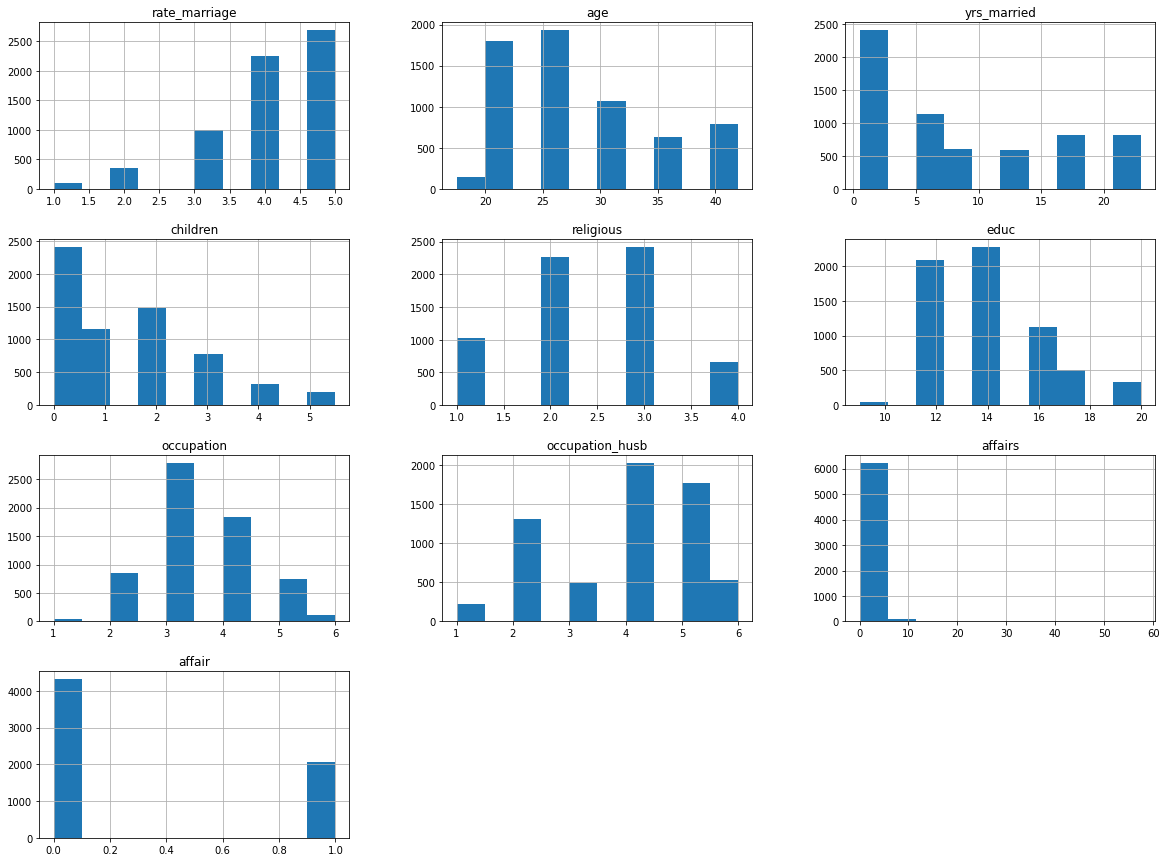

In [15]:
dta.hist(figsize=(20,15))

In [16]:
# Rate Marrigae: 4 and 5
# Age 20 to 32
# Marriage Age 1 to 2
# Affair 50 % less 
# childre 0 is more then 1 then 2 or 3

In [17]:
dta.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [18]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [19]:
# Who has affairs
# 1. rate_marriage < 
# 2. age > ~30
# 3. yrs_married > ~11
# 4. children > ~1

In [26]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [27]:
dta.groupby('yrs_married').mean()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs,affair
yrs_married,,,,,,,,,
0.5,4.524324,22.156757,0.048649,2.454054,14.237838,3.302703,3.502703,0.546486,0.043243
2.5,4.239921,23.640364,0.297198,2.312684,14.384956,3.383481,3.614061,0.984877,0.215831
6.0,4.066608,26.439089,1.036810,2.347064,14.454864,3.469763,3.881683,0.741184,0.339176
9.0,3.985050,28.985050,1.649502,2.368771,14.367110,3.393688,4.061462,0.737495,0.421927
13.0,4.038983,32.610169,1.916102,2.457627,14.218644,3.474576,4.100000,0.508149,0.411864
16.5,3.952323,35.135697,2.814181,2.601467,13.710269,3.415648,4.014670,0.484304,0.451100
23.0,3.956843,41.013564,3.281751,2.652281,13.794081,3.511714,4.051788,0.369099,0.425401


In [38]:
dta.groupby(['yrs_married','affair'])['affair'].count()

yrs_married  affair
0.5          0          354
             1           16
2.5          0         1595
             1          439
6.0          0          754
             1          387
9.0          0          348
             1          254
13.0         0          347
             1          243
16.5         0          449
             1          369
23.0         0          466
             1          345
Name: affair, dtype: int64

In [47]:
dta.groupby(['yrs_married'])['affair'].apply(lambda x: (x==1).sum()).reset_index(name='count')

,yrs_married,count
0,0.5,16
1,2.5,439
2,6.0,387
3,9.0,254
4,13.0,243
5,16.5,369
6,23.0,345


<AxesSubplot:>

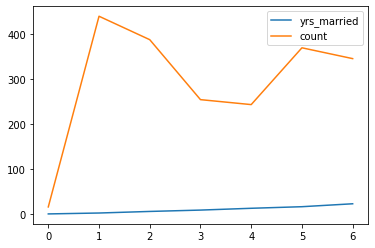

In [48]:
dta.groupby(['yrs_married'])['affair'].apply(lambda x: (x==1).sum()).reset_index(name='count').plot()

Text(0, 0.5, 'Frequency')

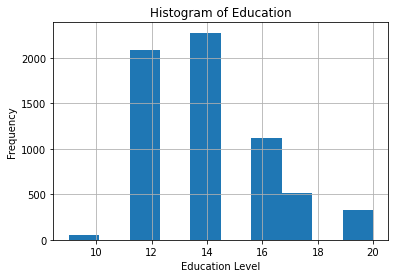

In [49]:
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

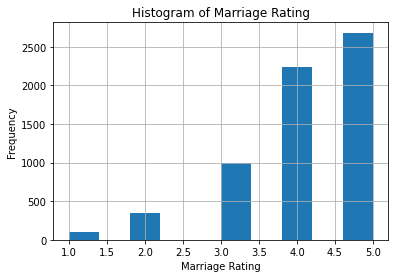

In [50]:
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

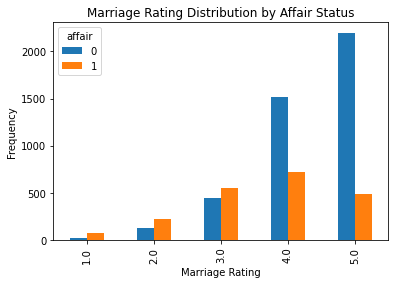

In [51]:
pd.crosstab(dta.rate_marriage, dta.affair).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

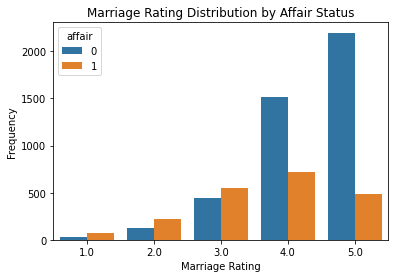

In [52]:
import seaborn as sns
sns.countplot(x='rate_marriage',data=dta,hue='affair')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

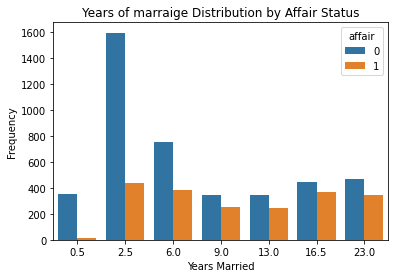

In [53]:
sns.countplot(x='yrs_married',data=dta,hue='affair')
plt.title('Years of marraige Distribution by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

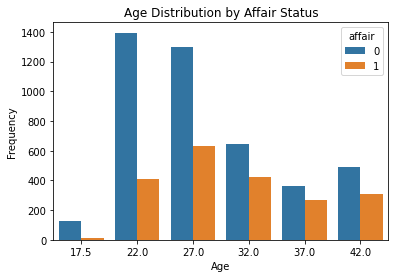

In [54]:
sns.countplot(x='age',data=dta,hue='affair')
plt.title('Age Distribution by Affair Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [55]:
dta['occupation'].value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

In [57]:
X = X.drop(['Intercept'], axis=1)

In [59]:
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
predicted = model.predict(X_test)
predicted

array([0., 1., 1., ..., 0., 1., 0.])

In [63]:
metrics.accuracy_score(y_test,predicted)

0.7308900523560209

In [64]:
probs = model.predict_proba(X_test)

In [65]:
probs

array([[0.77131565, 0.22868435],
       [0.4054677 , 0.5945323 ],
       [0.35180225, 0.64819775],
       ...,
       [0.67429782, 0.32570218],
       [0.47350381, 0.52649619],
       [0.59554585, 0.40445415]])

In [66]:
metrics.roc_auc_score(y_test, probs[:,1])

0.7531468143901509

In [67]:
metrics.confusion_matrix(y_test,predicted)

array([[1196,  128],
       [ 386,  200]], dtype=int64)

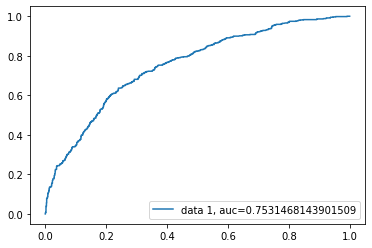

In [68]:
fpr, tpr, _ = metrics.roc_curve(y_test,  probs[:,1])
auc = metrics.roc_auc_score(y_test, probs[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [69]:
metrics.classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n         0.0       0.76      0.90      0.82      1324\n         1.0       0.61      0.34      0.44       586\n\n    accuracy                           0.73      1910\n   macro avg       0.68      0.62      0.63      1910\nweighted avg       0.71      0.73      0.70      1910\n'

In [70]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      1324
         1.0       0.61      0.34      0.44       586

    accuracy                           0.73      1910
   macro avg       0.68      0.62      0.63      1910
weighted avg       0.71      0.73      0.70      1910



In [71]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.70179372, 0.71524664, 0.73766816, 0.6793722 , 0.7264574 ,
        0.71300448, 0.73932584, 0.73033708, 0.71460674, 0.71910112]),
 0.7176913387413715)

##### for implementation

In [72]:
numerical_cols = X.select_dtypes(exclude='object').columns
numerical_cols

Index(['occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2', 'occ_husb_3',
       'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage', 'age',
       'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())
    ])

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
])

In [74]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())


In [75]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [76]:
predicted = model1.predict(X_test)
predicted

array([0., 1., 1., ..., 0., 1., 0.])

In [77]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.69506726, 0.71300448, 0.73542601, 0.69058296, 0.72197309,
        0.71076233, 0.73932584, 0.72359551, 0.71235955, 0.72134831]),
 0.7163445356980904)

(array([0.70179372, 0.71524664, 0.73766816, 0.6793722 , 0.7264574 ,
        0.71300448, 0.73932584, 0.73033708, 0.71460674, 0.71910112]),
 0.7176913387413715)


(array([0.69506726, 0.71300448, 0.73542601, 0.69058296, 0.72197309,
        0.71076233, 0.73932584, 0.72359551, 0.71235955, 0.72134831]),
 0.7163445356980904)
 
**Not much Improvement**

In [89]:
predicted = model1.predict(X_test)
predicted

array([0., 1., 1., ..., 0., 1., 0.])

In [90]:
metrics.accuracy_score(y_test,predicted)

0.7361256544502618

In [91]:
probs = model1.predict_proba(X_test)
metrics.roc_auc_score(y_test, probs[:,1])

0.7505935318560986

In [92]:
metrics.confusion_matrix(y_test,predicted)

array([[1202,  122],
       [ 382,  204]], dtype=int64)

    array([[1196,  128],
           [ 386,  200]], dtype=int64)

In [94]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83      1324
         1.0       0.63      0.35      0.45       586

    accuracy                           0.74      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.72      0.74      0.71      1910



                  precision    recall  f1-score   support

             0.0       0.76      0.90      0.82      1324
             1.0       0.61      0.34      0.44       586

        accuracy                           0.73      1910
       macro avg       0.68      0.62      0.63      1910
    weighted avg       0.71      0.73      0.70      1910



In [95]:
# conclusion: without standardisation model might be overfitting but accuracy scory on 10 validation is almost same... 